In [1]:
# Machine Learning Model for 'Geld ausgegeben' prediction over other parameters of Einkaufsstatistik

# Importing the libraries

# Load numpy
import numpy as np

# Load pandas
import pandas as pd

# Plotting library
import seaborn as sns
import matplotlib.pyplot as plt

# sklearn library
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

# render plots in jupyter notebook
%matplotlib inline

In [2]:
# Importing the dependencies
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Using TensorFlow backend.


In [3]:
# Importing the dataset
dataset = pd.read_csv('Preprocessed_data.csv')

In [4]:
# Modelling

# X and y arrays
X = dataset[['KaeuferID', 'ProduktID', 'Geschlecht', 'Berufskategorie', 'Anzahl_Jahre_in_aktueller_Stadt', 'Familienstand', 'Produkt_Kategorie_1', 'Produkt_Kategorie_2', 'Produkt_Kategorie_3', '0-17', '18-25', '26-35', '36-45', '46-50', '51-55', 'A', 'B']]
y = dataset['Geld_ausgegeben']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
# Creating and Training the Model

# Initialising the DNN
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2304      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 167,169
Trainable params: 167,169
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Define a checkpoint callback
checkpoint_name = 'Weights_Deep_Neural_Network_All_Features-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [7]:
# Train the model
NN_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split = 0.2, callbacks=callbacks_list)

Train on 320000 samples, validate on 80000 samples
Epoch 1/50
320000/320000 [==============================] - 194s 608us/step - loss: 3051.3143 - mean_absolute_error: 3051.3149 - val_loss: 2751.4019 - val_mean_absolute_error: 2751.4062

Epoch 00001: val_loss improved from inf to 2751.40192, saving model to Weights_Deep_Neural_Network_All_Features-001--2751.40192.hdf5
Epoch 2/50
320000/320000 [==============================] - 215s 672us/step - loss: 2462.3768 - mean_absolute_error: 2462.3777 - val_loss: 2334.1913 - val_mean_absolute_error: 2334.1909

Epoch 00002: val_loss improved from 2751.40192 to 2334.19130, saving model to Weights_Deep_Neural_Network_All_Features-002--2334.19130.hdf5
Epoch 3/50
320000/320000 [==============================] - 213s 666us/step - loss: 2300.6819 - mean_absolute_error: 2300.6809 - val_loss: 2256.0768 - val_mean_absolute_error: 2256.0835

Epoch 00003: val_loss improved from 2334.19130 to 2256.07676, saving model to Weights_Deep_Neural_Network_All_Featu

320000/320000 [==============================] - 153s 480us/step - loss: 2109.4968 - mean_absolute_error: 2109.4958 - val_loss: 2125.5705 - val_mean_absolute_error: 2125.5684

Epoch 00031: val_loss did not improve from 2111.72798
Epoch 32/50
320000/320000 [==============================] - 152s 474us/step - loss: 2104.3253 - mean_absolute_error: 2104.3320 - val_loss: 2121.2429 - val_mean_absolute_error: 2121.2424

Epoch 00033: val_loss did not improve from 2109.81245
Epoch 34/50
320000/320000 [==============================] - 150s 468us/step - loss: 2094.8896 - mean_absolute_error: 2094.8931 - val_loss: 2095.7496 - val_mean_absolute_error: 2095.7446

Epoch 00037: val_loss improved from 2109.81245 to 2095.74962, saving model to Weights_Deep_Neural_Network_All_Features-037--2095.74962.hdf5
Epoch 38/50
320000/320000 [==============================] - 152s 475us/step - loss: 2093.5375 - mean_absolute_error: 2093.5422 - val_loss: 2111.5648 - val_mean_absolute_error: 2111.5635

Epoch 00038:

In [11]:
# Load weights file of the best model :
# weights_file = 'Weights_Deep_Neural_Network_All_Features-50--2083.24621.hdf5' # choose the best checkpoint 
# NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

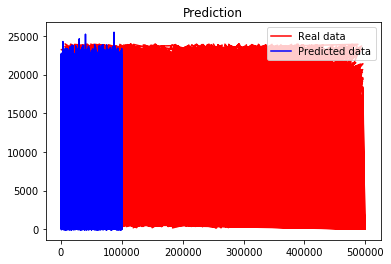

In [12]:
# Predictions from our Model
predictions = NN_model.predict(X_test)
#plt.scatter(y_test,predictions)
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(predictions, color = 'blue', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [15]:
# sns.distplot((y_test-predictions),bins=50);

In [16]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2_Score:', metrics.r2_score(y_test, predictions))

MAE: 2092.3425488851212
MSE: 8403692.209409634
RMSE: 2898.9122458966626
R2_Score: 0.6685367511442174
